# World Happiness Report


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"https://github.com/dsrscientist/DSData/raw/master/happiness_score_dataset.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [8]:
df.shape

(158, 12)

In [9]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
df.sort_values(by="Happiness Rank", ascending=True)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Data Exploration

In [11]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


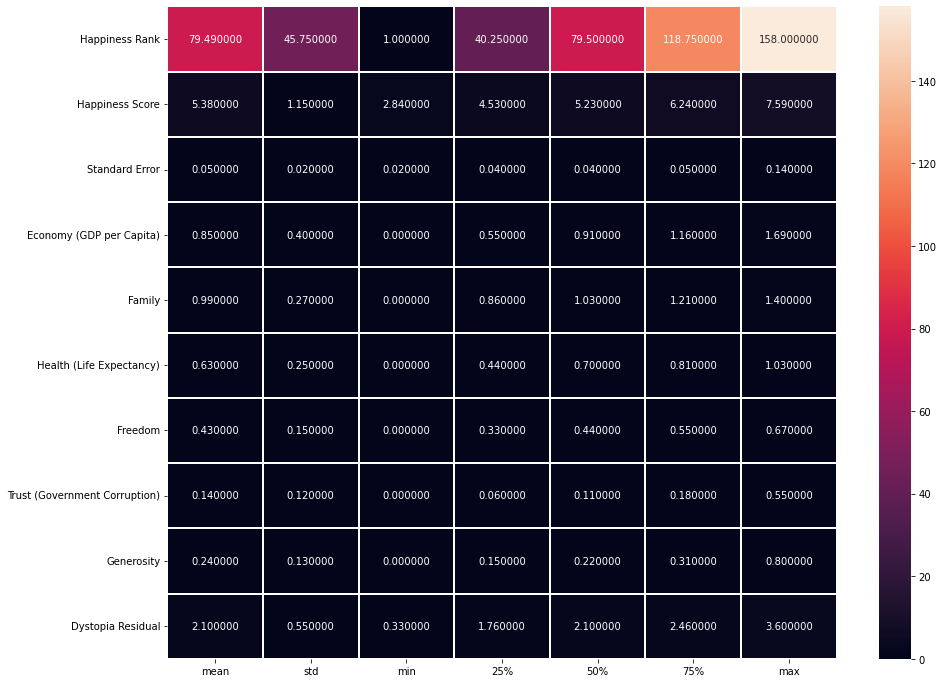

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Correlation:

In [14]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [15]:
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

# Correlation using heatmap:

<AxesSubplot:>

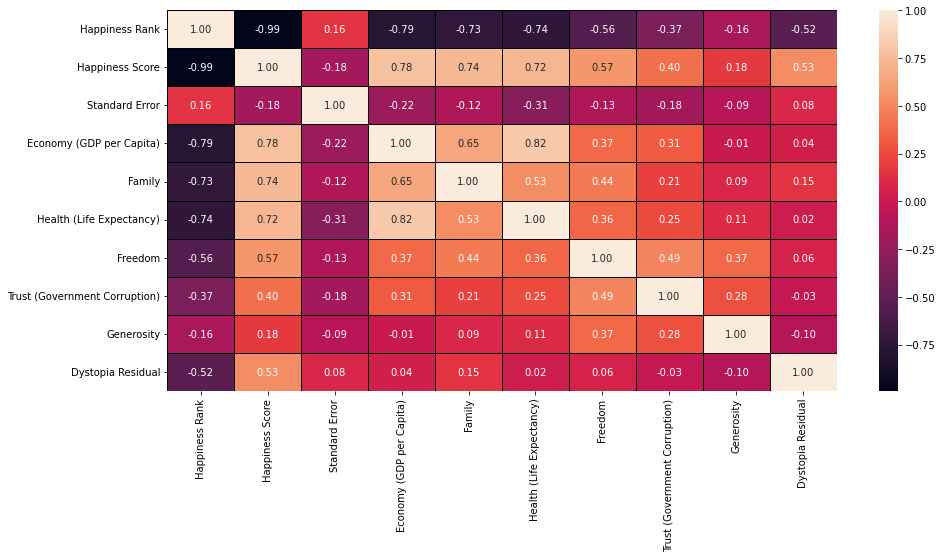

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='.2f')

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Standard Error'}>,
        <AxesSubplot:title={'center':'Economy (GDP per Capita)'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health (Life Expectancy)'}>,
        <AxesSubplot:title={'center':'Freedom'}>],
       [<AxesSubplot:title={'center':'Trust (Government Corruption)'}>,
        <AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Dystopia Residual'}>]], dtype=object)

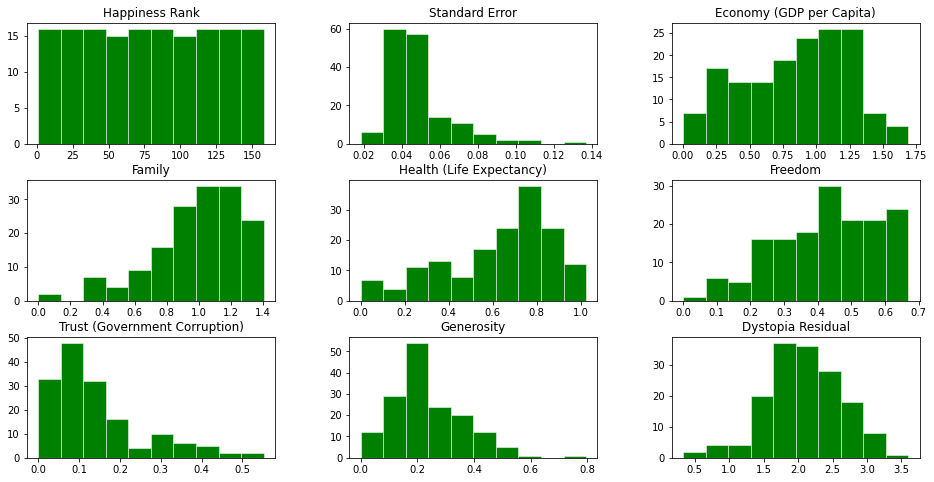

In [18]:
df.drop(['Happiness Score'],axis=1).hist(edgecolor='white', linewidth=0.5, figsize=(16,8), grid=False, color='green')

# Normal Distribution Curve:

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

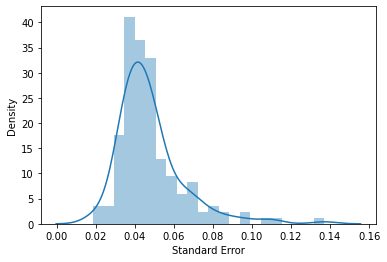

In [19]:
sns.distplot(df["Standard Error"])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

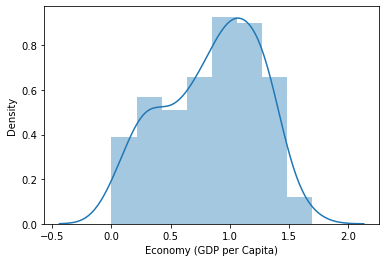

In [20]:
sns.distplot(df["Economy (GDP per Capita)"])

<AxesSubplot:xlabel='Family', ylabel='Density'>

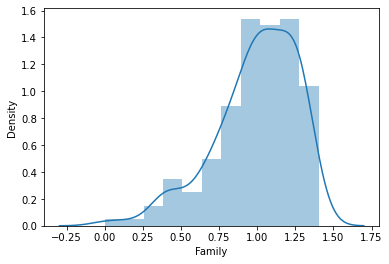

In [21]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

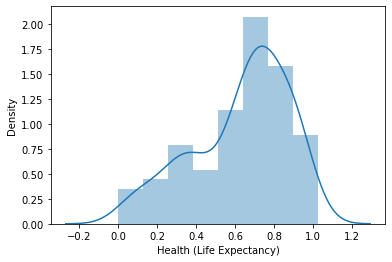

In [22]:
sns.distplot(df["Health (Life Expectancy)"])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

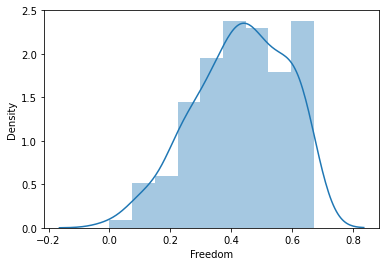

In [23]:
sns.distplot(df["Freedom"])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

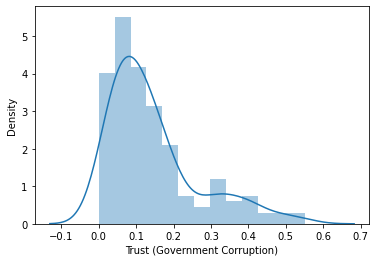

In [24]:
sns.distplot(df["Trust (Government Corruption)"])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

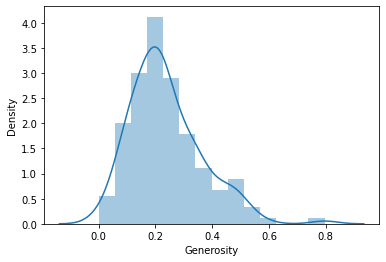

In [25]:
sns.distplot(df["Generosity"])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

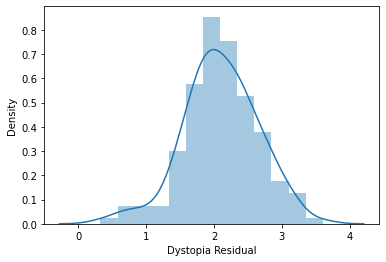

In [26]:
sns.distplot(df["Dystopia Residual"])

# Scatterplot:

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

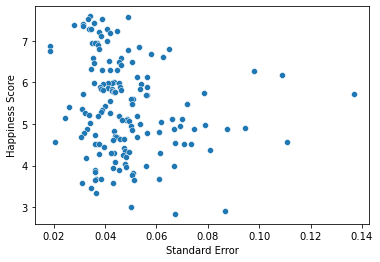

In [27]:
sns.scatterplot(x='Standard Error',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

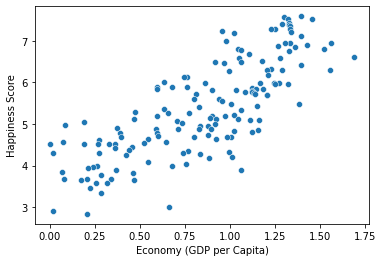

In [28]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

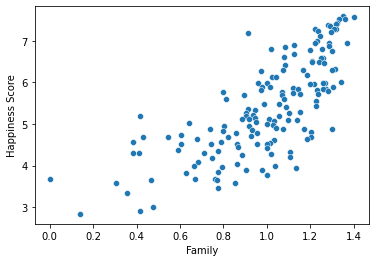

In [29]:
sns.scatterplot(x='Family',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

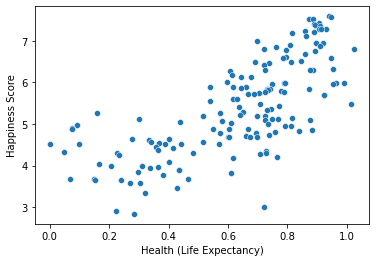

In [30]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

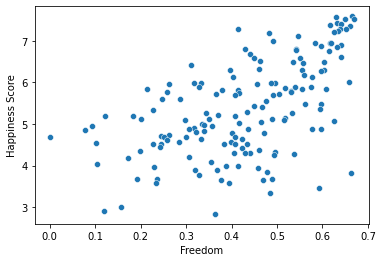

In [31]:
sns.scatterplot(x='Freedom',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

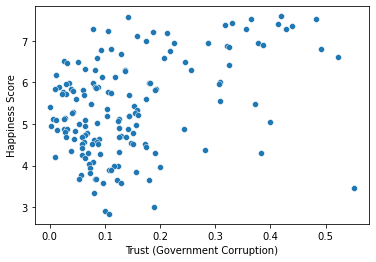

In [32]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

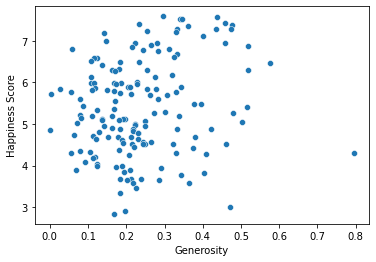

In [33]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

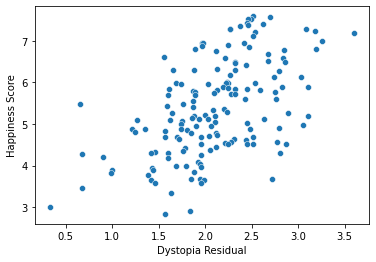

In [34]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=df)

# LabelEncoder:

In [35]:
le = LabelEncoder()

list1 = ['Country','Region']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Outliers checking:

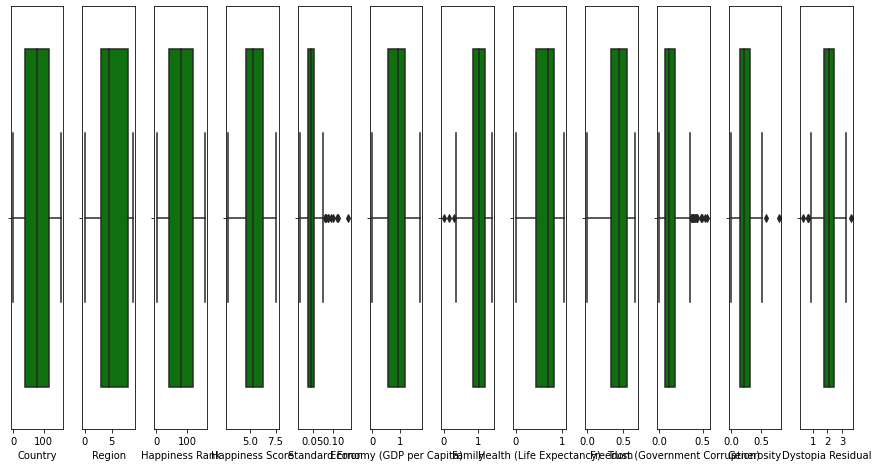

In [36]:
collist = df.columns.values
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

# Removing outliers:

Z-Score technique:

In [37]:
z=np.abs(zscore(df))
z.shape

(158, 12)

In [38]:
threshold = 3 
#index number
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [39]:
len(np.where(z>3)[0])

9

In [40]:
z.iloc[27]

Country                          0.800267
Region                           0.375441
Happiness Rank                   1.129016
Happiness Score                  1.082256
Standard Error                   0.859197
Economy (GDP per Capita)         2.101026
Family                           0.322476
Health (Life Expectancy)         0.678336
Freedom                          1.409878
Trust (Government Corruption)    3.164619
Generosity                       0.700286
Dystopia Residual                0.982677
Name: 27, dtype: float64

In [41]:
df_new = df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)
print("New DataFrame",df_new.shape)
print("total_dropped_rows",df.shape[0]-df_new.shape[0])

Old DataFrame (158, 12)
New DataFrame (149, 12)
total_dropped_rows 9


# Percentage of data loss:

In [1]:
loss_percent=(158-149)/158*100
print(loss_percent,'%')

5.69620253164557 %


# Skewness:

In [43]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Splitting the data:

In [45]:
x = df.drop(['Happiness Score'],axis=1)
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [46]:
y = df['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [47]:
x.shape

(158, 11)

In [48]:
y.shape

(158,)

# Transforming data to remove skewness:

In [49]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.17106926,  1.24453048, -2.06341393, ...,  1.77399061,
         0.62239051,  0.75099154],
       [-0.3443269 ,  1.24453048, -2.00849761, ...,  0.31599326,
         1.48099498,  1.11001108],
       [-0.84509236,  1.24453048, -1.95857395, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [ 1.18876946, -0.30300992,  1.52535242, ...,  0.73891461,
         1.65933595, -2.86621557],
       [-1.28332767,  0.95510156,  1.54254416, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [ 1.27672507,  0.95510156,  1.55970548, ..., -0.06732623,
        -0.49041465, -0.97664547]])

In [50]:
pd.DataFrame(x).skew()

0    -0.279791
1    -0.228041
2    -0.264365
3    -0.020092
4    -0.127233
5    -0.169651
6    -0.183181
7    -0.080728
8     0.185965
9     0.013320
10    0.022925
dtype: float64

In [51]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.17106926,  1.24453048, -2.06341393, ...,  1.77399061,
         0.62239051,  0.75099154],
       [-0.3443269 ,  1.24453048, -2.00849761, ...,  0.31599326,
         1.48099498,  1.11001108],
       [-0.84509236,  1.24453048, -1.95857395, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [ 1.18876946, -0.30300992,  1.52535242, ...,  0.73891461,
         1.65933595, -2.86621557],
       [-1.28332767,  0.95510156,  1.54254416, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [ 1.27672507,  0.95510156,  1.55970548, ..., -0.06732623,
        -0.49041465, -0.97664547]])

In [52]:
xf=pd.DataFrame(data=x)
xf

,0,1,2,3,4,5,6,7,8,9,10
0,1.171069,1.244530,-2.063414,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,-0.344327,1.244530,-2.008498,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,-0.845092,1.244530,-1.958574,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,0.620972,1.244530,-1.912062,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,-1.195601,0.030337,-1.868100,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...,...,...,...
153,0.864172,0.955102,1.490877,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259
154,-1.536462,0.955102,1.508130,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565
155,1.188769,-0.303010,1.525352,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216
156,-1.283328,0.955102,1.542544,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [54]:
x_train.shape

(105, 11)

In [55]:
y_train.shape

(105,)

In [56]:
x_test.shape

(53, 11)

In [57]:
y_test.shape

(53,)

In [58]:
lm = LinearRegression()

In [59]:
lm.fit(x_train,y_train)

LinearRegression()

In [60]:
lm.coef_

array([ 0.00270414, -0.02337971, -0.3271553 , -0.00953523,  0.29951666,
        0.19642923,  0.16522448,  0.1119106 ,  0.04703493,  0.0672626 ,
        0.38574472])

In [61]:
lm.intercept_

5.371831267594474

In [62]:
print("Training Accuracy : ", lm.score(x_train, y_train))
print("Testing Accuracy : ", lm.score(x_test, y_test))

Training Accuracy :  0.9938605207357608
Testing Accuracy :  0.9925680386552586


In [63]:
#predict the value
pred = lm.predict(x_test)
print("Predicted result price:", pred)
print("actual price",y_test)

Predicted result price: [4.00511462 6.15872324 4.13891467 3.22455097 4.76662611 6.62814133
 4.91842901 4.70872805 4.89876082 3.93297275 6.86005644 5.7775537
 7.05325276 5.50129206 6.81795912 6.59118673 4.50303095 4.62825084
 5.01947683 5.6538133  3.6810115  6.98737899 7.24777585 7.3183976
 6.50100646 5.14378379 5.90345108 3.88561067 4.22878789 3.69631822
 3.73841428 5.29919166 3.98602087 5.89038132 4.28754001 5.07780315
 3.52617448 6.10802135 5.5181249  4.4534433  6.65860528 4.03638864
 5.13625289 3.73765355 6.31770722 5.27805809 6.86561222 4.24349545
 3.86163906 7.3175438  5.18657104 5.53268105 4.3146603 ]
actual price 128    4.307
45     5.987
134    4.194
156    2.905
90     5.057
29     6.574
96     4.898
98     4.876
95     4.949
140    3.931
19     6.901
56     5.828
15     6.983
69     5.548
24     6.786
30     6.505
122    4.507
109    4.686
93     4.971
65     5.695
150    3.655
18     6.937
12     7.200
9      7.284
31     6.485
81     5.192
51     5.889
139    3.956
125    4

In [64]:
print('error: ')

print('Mean absolute error: ', mean_absolute_error(y_test,pred))
print('Mean squared error: ', mean_squared_error(y_test,pred))

print('Root Mean squared error: ', np.sqrt(mean_squared_error(y_test,pred)))

error: 
Mean absolute error:  0.06921958414006073
Mean squared error:  0.009871640701726006
Root Mean squared error:  0.09935613067005984


In [65]:
print(r2_score(y_test,pred))

0.9925680386552586
